## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [36]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [37]:
dframe = pd.read_csv('students-data.csv', doublequote= True, sep =';', quoting = 3)
dframe=dframe.replace({'"': ''}, regex=True)
dframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [38]:
dframe.index.name = 'number'
dframe.dropna(axis = 1, inplace = True)
dframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [39]:
dframe.select_dtypes(include = 'int')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
number,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15
6,16,2,2,1,2,0,4,4,4,1,1,3,0,11
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6
8,15,3,2,1,2,0,4,2,2,1,1,1,0,19


In [40]:
dframe.select_dtypes(exclude='int')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,G1,G2
number,,,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,5,6
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,5,5
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,7,8
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,15,14
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,6,10
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no,15,15
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no,12,12
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no,6,5
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no,16,18


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [41]:
dframe.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G3            20.989616
dtype: float64

In [42]:
 #freetime had variance 0.99 ~= 1
dframe.drop(['traveltime','studytime','failures','famrel','Dalc'], axis = 1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,freetime,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,3,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,3,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,3,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,2,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,3,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,4,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,1,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,2,2,1,1,0,16,18,19


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

columns = ['school','sex','address','famsize','Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
              'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

dframe[columns] = dframe[columns].apply(lambda col: labelencoder.fit_transform(col))

dframe.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,16,18,19


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [44]:
dframe['G1'] = dframe['G1'].astype(int)
dframe['G2'] = dframe['G2'].astype(int)
dframe['G3'] = dframe['G3'].astype(int)

dframe['G1_Encoded'] = dframe['G1'].apply(lambda x: 1 if x >= 10 else 0)
dframe['G2_Encoded'] = dframe['G2'].apply(lambda x: 1 if x >= 10 else 0)
dframe['G3_Encoded'] = dframe['G3'].apply(lambda x: 1 if x >= 10 else 0)

dframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,G1_Encoded,G2_Encoded,G3_Encoded
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,3,6,5,6,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,3,4,5,5,6,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,7,8,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,5,2,15,14,15,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,2,5,4,6,10,10,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,2,5,10,15,15,15,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,3,0,12,12,11,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,1,1,6,6,5,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,1,0,16,18,19,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [45]:
# COPY ALL EXCPET G3_ENCODED COLUMN DATA AS X - DROPPING G1, G2 & G3 SINCE G1_ENCODED & G2_ENCODED WILL HOLD THE VALUES
X = dframe.drop(['G1', 'G2', 'G3', 'G3_Encoded'], axis = 1)

# GET ONLY G3 AS TARGET COLUMN INTO Y
y = dframe[['G3_Encoded']]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

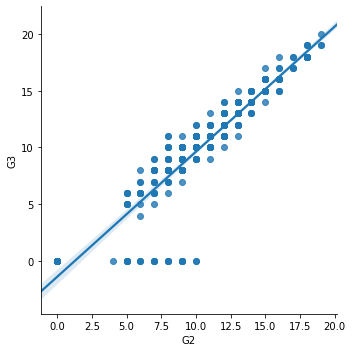

In [46]:
sns.lmplot("G2","G3",dframe)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

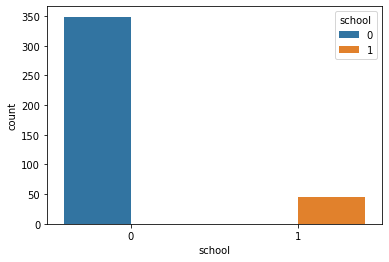

In [47]:
sns.countplot(dframe['school'], hue = dframe['school'])

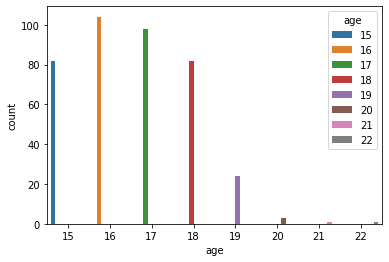

In [48]:
sns.countplot(dframe['age'], hue= dframe['age'])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [49]:
array = dframe.values  
test_size = 0.2405
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print('X Train Size', X_train.size, '& Y Train Size', y_train.size)
print('X Test Size', X_test.size, '& Y Test Size', y_test.size)

X Train Size 9600 & Y Train Size 300
X Test Size 3040 & Y Test Size 95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
model_score = model.score(X_test, y_test)
print('Model Score: ', model_score)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, y_predict))

f1_score(y_test, y_predict, average='macro')  
print('Precision Score: ', precision_score(y_test, y_predict, average="macro"))
print('Recall Score: ', recall_score(y_test, y_predict, average="macro"))

Model Score:  0.9473684210526315
Confusion Matrix: 
[[22  3]
 [ 2 68]]
Precision Score:  0.937206572769953
Recall Score:  0.9257142857142857


# Naive bayes with Iris data

### Import Iris.csv

In [52]:
iris_df = pd.read_csv('Iris.csv')

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [53]:
X = iris_df.drop(['Class'], axis = 1)

y = iris_df[['Class']]

### Find the distribution of target variable (Class)

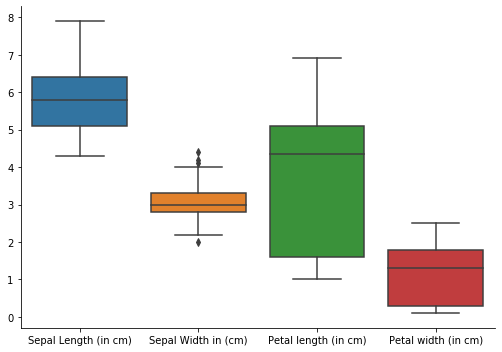

In [54]:
sns.catplot(data=iris_df, kind="box", aspect = 11.7/8.27);

### Plot the distribution of target variable using histogram

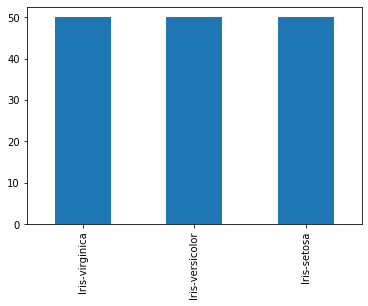

In [55]:
pd.value_counts(iris_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

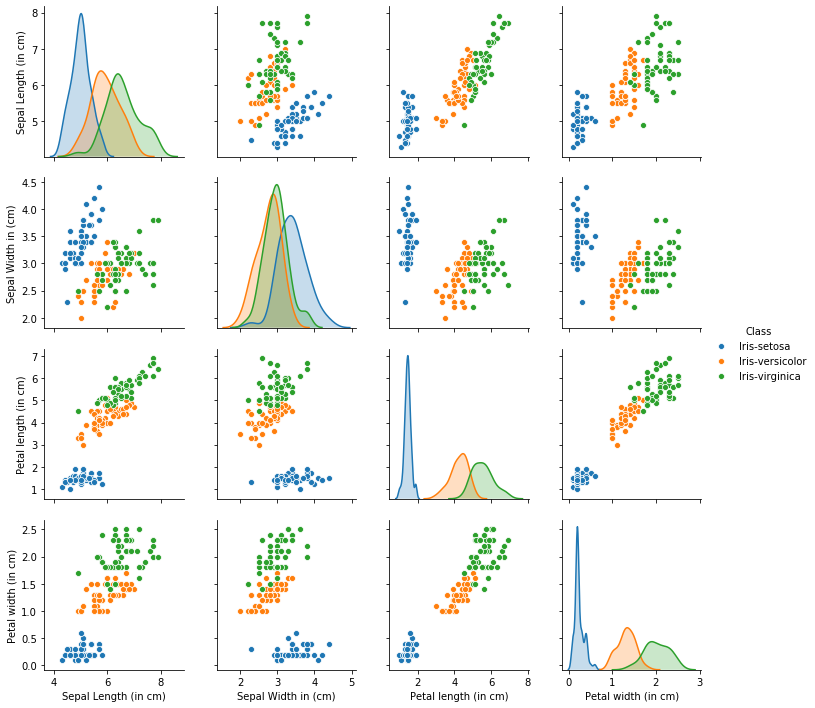

In [56]:
sns.pairplot(iris_df, hue= 'Class')

### Summary Statistics and explain insights for at least 2 variables

In [58]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### Correlation among all variables and give your insights

In [59]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


### Split data in Training and Validation in 80:20

In [61]:
array = iris_df.values

test_size = 0.20 # taking 80:20 training and test set
seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Do Feature Scaling

In [62]:
from sklearn.preprocessing import scale
scale(X_train)

array([[ 0.31553662, -0.03612186,  0.44748582,  0.2345312 ],
       [ 2.2449325 , -0.03612186,  1.29803965,  1.39642889],
       [-0.2873996 , -1.240184  ,  0.0505607 , -0.15276803],
       [ 0.67729835, -0.51774672,  1.01452171,  1.13822941],
       [-0.04622511, -0.51774672,  0.73100376,  1.52552864],
       [-0.64916132,  1.64956512, -1.31032543, -1.31466572],
       [-0.40798684, -1.72180885,  0.10726429,  0.10543146],
       [-0.76974857,  0.92712784, -1.36702901, -1.31466572],
       [ 0.79788559, -0.51774672,  0.44748582,  0.36363094],
       [ 1.03906007, -1.240184  ,  1.12792888,  0.75093018],
       [ 1.15964732, -0.03612186,  0.95781812,  1.13822941],
       [-0.89033581,  1.16794027, -1.36702901, -1.18556598],
       [ 0.19494938, -1.96262128,  0.67430017,  0.36363094],
       [ 0.5567111 , -0.27693429,  1.01452171,  0.75093018],
       [ 0.91847283, -0.27693429,  0.44748582,  0.10543146],
       [ 2.2449325 , -0.99937157,  1.75166836,  1.39642889],
       [-0.16681235,  1.

### Train and Fit NaiveBayes Model

In [63]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Print Accuracy and Confusion Matrix and Conclude your findings

In [65]:
print('Accuracy:', model.score(X_test, y_test))
print(metrics.confusion_matrix(expected, predicted))

Accuracy: 0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
